In [221]:
!pip install pandas

# **ECCENTRICITY**

In [222]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [223]:
df = pd.read_csv('/content/eccentricity.csv')
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [224]:
print(df.head())

    sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0  2.522315  2.431974  31:39.0  8.332031           0    eccentricity
1  2.523629  2.431317  31:39.0  8.332031           0    eccentricity
2  2.522644  2.428032  31:39.0  8.332031           0    eccentricity
3  2.521987  2.430660  31:39.0  8.332031           0    eccentricity
4  2.522808  2.430168  31:39.0  8.332031           0    eccentricity


In [225]:
df['time_x'].head()

0    31:39.0
1    31:39.0
2    31:39.0
3    31:39.0
4    31:39.0
Name: time_x, dtype: object

In [226]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['time_x'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [227]:
# Convert 'time_x' to seconds
df['time_x_seconds'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df = df[(df['time_x_seconds'] >= 39) & (df['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [228]:
# Convert 'time_x' to seconds
df['time_x_seconds'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 40 and 41
filtered_df1 = df[(df['time_x_seconds'] >= 40) & (df['time_x_seconds'] < 41)]

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [229]:
df.head(50)

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds
0,2.522315,2.431974,31:39.000000,8.332031,0,eccentricity,1899.0
1,2.523629,2.431317,31:39.000000,8.332031,0,eccentricity,1899.0
2,2.522644,2.428032,31:39.000000,8.332031,0,eccentricity,1899.0
3,2.521987,2.430660,31:39.000000,8.332031,0,eccentricity,1899.0
4,2.522808,2.430168,31:39.000000,8.332031,0,eccentricity,1899.0
5,2.523136,2.431974,31:39.000000,8.332031,0,eccentricity,1899.0
6,2.522151,2.429182,31:39.000000,8.332031,0,eccentricity,1899.0
7,2.519851,2.431153,31:39.000000,8.332031,0,eccentricity,1899.0
8,2.522479,2.430496,31:39.000000,8.332031,0,eccentricity,1899.0
9,2.523301,2.432960,31:39.000000,8.332031,0,eccentricity,1899.0


In [230]:
df.shape

(53569, 7)

In [231]:
df.describe()

,sensor1,sensor2,speedSet,load_value,time_x_seconds
count,53569.000000,53569.000000,53569.000000,53569.000000,53569.000000
mean,2.522177,2.431495,9.442524,37.335026,1928.522927
std,0.001637,0.001732,4.156535,39.911498,208.986962
min,2.505232,2.413085,8.332031,0.000000,1200.000000
25%,2.521330,2.430660,8.332031,0.000000,1901.000000
50%,2.522151,2.431482,8.332031,0.000000,1903.600000
75%,2.523136,2.432467,8.332031,80.000000,2059.300000
max,2.537098,2.441173,25.000000,80.000000,2062.000000


In [232]:
df.columns

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'time_x_seconds'],
      dtype='object')

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53569 entries, 0 to 53568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor1          53569 non-null  float64
 1   sensor2          53569 non-null  float64
 2   time_x           53569 non-null  object 
 3   speedSet         53569 non-null  float64
 4   load_value       53569 non-null  int64  
 5   gear_fault_desc  53569 non-null  object 
 6   time_x_seconds   53569 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ MB


In [234]:
# Remove rows with NaN values
df_cleaned = df.dropna()

In [235]:
print(df_cleaned)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.522315  2.431974  31:39.000000   8.332031           0   
1      2.523629  2.431317  31:39.000000   8.332031           0   
2      2.522644  2.428032  31:39.000000   8.332031           0   
3      2.521987  2.430660  31:39.000000   8.332031           0   
4      2.522808  2.430168  31:39.000000   8.332031           0   
...         ...       ...           ...        ...         ...   
53564  2.523301  2.431974  20:00.700000  25.000000           0   
53565  2.521494  2.428853  20:00.700000  25.000000           0   
53566  2.520344  2.425568  20:00.700000  25.000000           0   
53567  2.521165  2.427868  20:00.700000  25.000000           0   
53568  2.521822  2.428361  20:00.700000  25.000000           0   

      gear_fault_desc  time_x_seconds  
0        eccentricity          1899.0  
1        eccentricity          1899.0  
2        eccentricity          1899.0  
3        eccentricity          1899.0  
4      

In [236]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['minute'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
20     3569
31    25000
34    25000
Name: count, dtype: int64


In [237]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
20     3569
31    25000
34    25000
Name: count, dtype: int64


In [238]:
df['minute'].value_counts().sort_index()

minute
20     3569
31    25000
34    25000
Name: count, dtype: int64

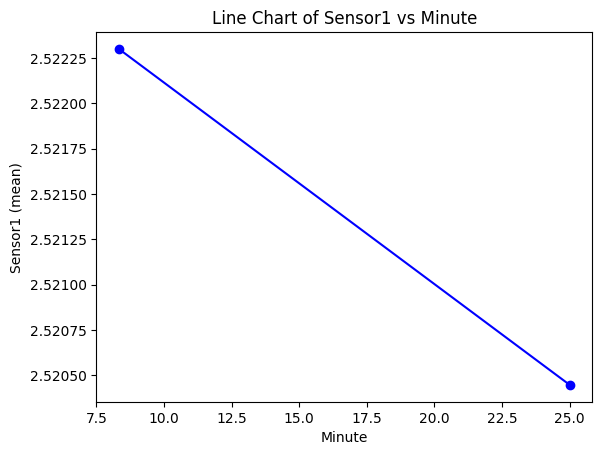

In [239]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [240]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['minute'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute
df['second'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df = df.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df)

        sensor1   sensor2        time_x   speedSet  load_value  \
50000  2.520344  2.433617  20:00.000000  25.000000           0   
50001  2.521165  2.423597  20:00.000000  25.000000           0   
50002  2.517716  2.424090  20:00.000000  25.000000           0   
50003  2.523629  2.436738  20:00.000000  25.000000           0   
50004  2.516730  2.431153  20:00.000000  25.000000           0   
...         ...       ...           ...        ...         ...   
49995  2.522151  2.433781  34:22.000000   8.332031          80   
49996  2.521494  2.430168  34:22.000000   8.332031          80   
49997  2.521822  2.429675  34:22.000000   8.332031          80   
49998  2.521165  2.429675  34:22.000000   8.332031          80   
49999  2.521822  2.433124  34:22.000000   8.332031          80   

      gear_fault_desc  time_x_seconds  minute  second  
50000    eccentricity          1200.0      20       0  
50001    eccentricity          1200.0      20       0  
50002    eccentricity          1200.0  

In [241]:
sorted_df = df.sort_values(by='minute')
sorted_df = df.sort_values(by='second')

In [242]:
sorted_df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
53568,2.521822,2.428361,20:00.700000,25.0,0,eccentric,1200.7,20,0
51194,2.526093,2.426225,20:00.200000,25.0,0,eccentricity,1200.2,20,0
51193,2.521822,2.425733,20:00.200000,25.0,0,eccentricity,1200.2,20,0
51192,2.520344,2.423762,20:00.200000,25.0,0,eccentricity,1200.2,20,0
51191,2.519523,2.430660,20:00.200000,25.0,0,eccentricity,1200.2,20,0


In [243]:
df = sorted_df

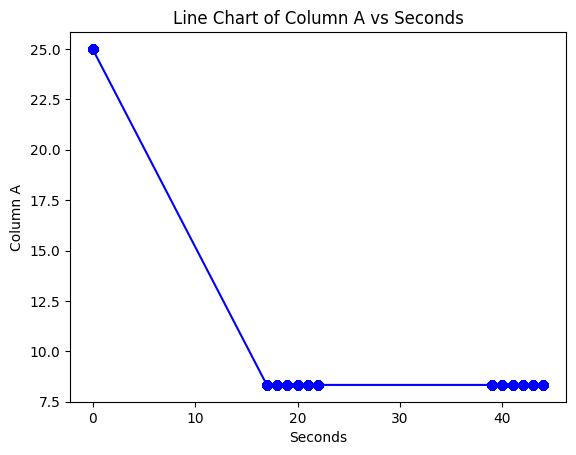

In [244]:
plt.plot(df['second'], df['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

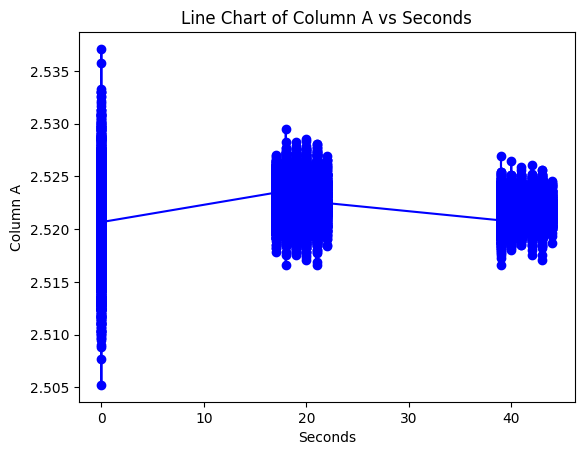

In [245]:
plt.plot(df['second'], df['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [246]:
df.tail()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
24842,2.520508,2.430660,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24843,2.521658,2.431974,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24844,2.522315,2.431810,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24830,2.522151,2.431153,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24800,2.522151,2.431646,31:44.000000,8.332031,0,eccentricity,1904.0,31,44


In [247]:
print(df.dtypes)

sensor1            float64
sensor2            float64
time_x              object
speedSet           float64
load_value           int64
gear_fault_desc     object
time_x_seconds     float64
minute               int32
second               int32
dtype: object


In [248]:
#Missing values
print(df.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


In [249]:
df.isna().sum().sum()

0

In [250]:
# Unique values for categorical columns
print(df['gear_fault_desc'].nunique())

2


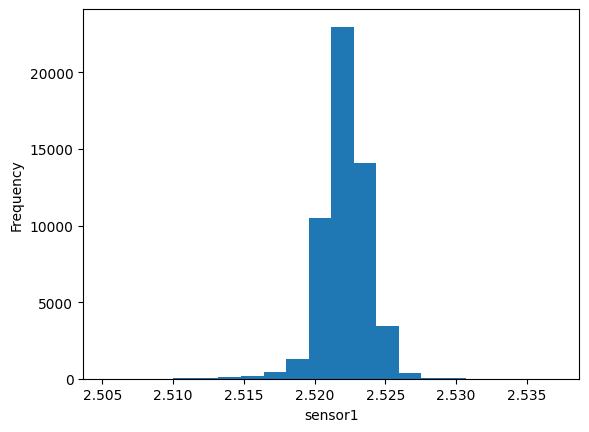

In [251]:
# Distribution of numerical columns
plt.hist(df['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

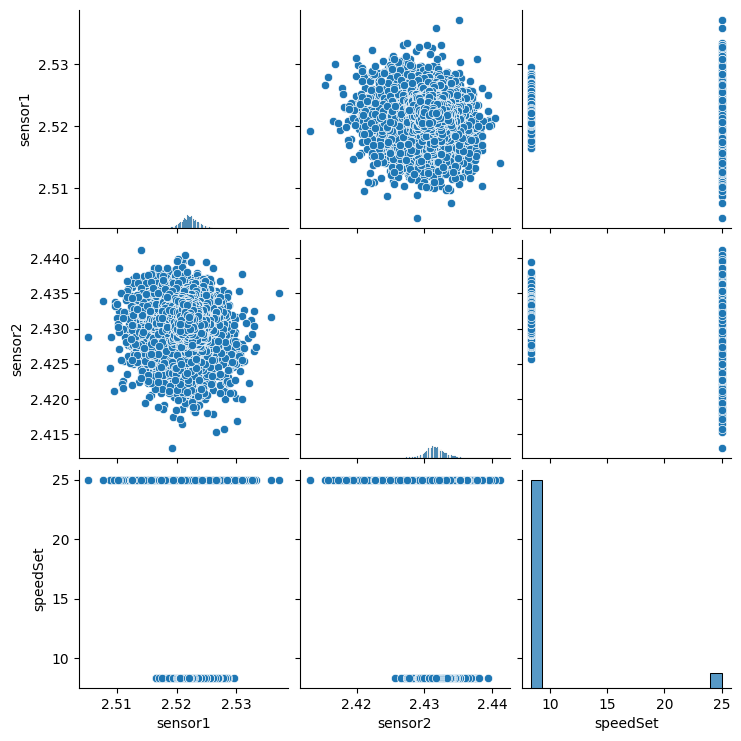

In [252]:
# Relationships between variables
sns.pairplot(df[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [253]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

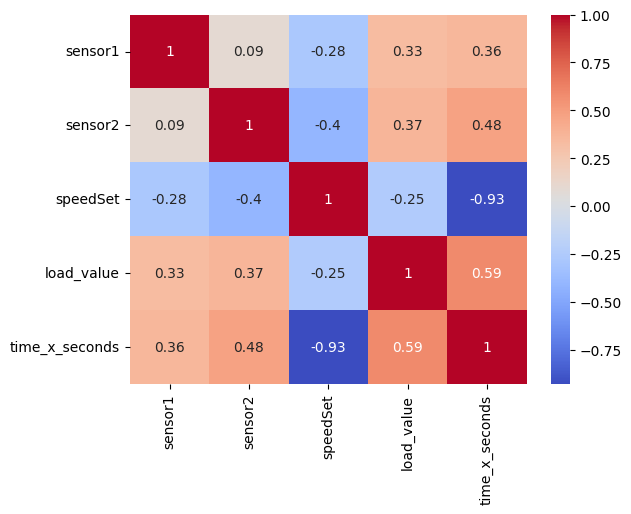

In [254]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [255]:
print(df['time_x'].iloc[0])

20:00.700000


In [256]:
# Assuming df is your DataFrame
df = pd.read_csv('/content/eccentricity.csv')

In [257]:
print(df)

        sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0      2.522315  2.431974  31:39.0   8.332031           0    eccentricity
1      2.523629  2.431317  31:39.0   8.332031           0    eccentricity
2      2.522644  2.428032  31:39.0   8.332031           0    eccentricity
3      2.521987  2.430660  31:39.0   8.332031           0    eccentricity
4      2.522808  2.430168  31:39.0   8.332031           0    eccentricity
...         ...       ...      ...        ...         ...             ...
53564  2.523301  2.431974  20:00.7  25.000000           0    eccentricity
53565  2.521494  2.428853  20:00.7  25.000000           0    eccentricity
53566  2.520344  2.425568  20:00.7  25.000000           0    eccentricity
53567  2.521165  2.427868  20:00.7  25.000000           0    eccentricity
53568  2.521822  2.428361  20:00.7  25.000000           0       eccentric

[53569 rows x 6 columns]


# **ROOT CRACK**

In [258]:
df2 = pd.read_csv('/content/root_crack.csv')

In [259]:
print(df2)

        sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0      2.519358  2.429675  41:31.0   8.332031         0.0      Root crack
1      2.519358  2.429839  41:31.0   8.332031         0.0      Root crack
2      2.521165  2.430496  41:31.0   8.332031         0.0      Root crack
3      2.520508  2.428853  41:31.0   8.332031         0.0      Root crack
4      2.519358  2.428689  41:31.0   8.332031         0.0      Root crack
...         ...       ...      ...        ...         ...             ...
77229  2.517716  2.446593  55:50.4  25.000000        80.0      Root crack
77230  2.523958  2.423597  55:50.4  25.000000        80.0      Root crack
77231  2.511967  2.439202  55:50.4  25.000000        80.0      Root crack
77232  2.526914  2.416370  55:50.4  25.000000        80.0      Root crack
77233  2.518537  2.426882      NaN        NaN         NaN             NaN

[77234 rows x 6 columns]


In [260]:
df2['time_x'].head()

0    41:31.0
1    41:31.0
2    41:31.0
3    41:31.0
4    41:31.0
Name: time_x, dtype: object

In [261]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['time_x'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [262]:
# Convert 'time_x' to seconds
df2['time_x_seconds'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df2 = df2[(df2['time_x_seconds'] >= 39) & (df2['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df2)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [263]:
df2.head(50)

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds
0,2.519358,2.429675,41:31.000000,8.332031,0.0,Root crack,2491.0
1,2.519358,2.429839,41:31.000000,8.332031,0.0,Root crack,2491.0
2,2.521165,2.430496,41:31.000000,8.332031,0.0,Root crack,2491.0
3,2.520508,2.428853,41:31.000000,8.332031,0.0,Root crack,2491.0
4,2.519358,2.428689,41:31.000000,8.332031,0.0,Root crack,2491.0
5,2.520837,2.429839,41:31.000000,8.332031,0.0,Root crack,2491.0
6,2.520180,2.429675,41:31.000000,8.332031,0.0,Root crack,2491.0
7,2.522151,2.429346,41:31.000000,8.332031,0.0,Root crack,2491.0
8,2.520837,2.428525,41:31.000000,8.332031,0.0,Root crack,2491.0
9,2.520344,2.429018,41:31.000000,8.332031,0.0,Root crack,2491.0


In [264]:
df2.shape

(77234, 7)

In [265]:
df2.describe

<bound method NDFrame.describe of         sensor1   sensor2        time_x   speedSet  load_value  \
0      2.519358  2.429675  41:31.000000   8.332031         0.0   
1      2.519358  2.429839  41:31.000000   8.332031         0.0   
2      2.521165  2.430496  41:31.000000   8.332031         0.0   
3      2.520508  2.428853  41:31.000000   8.332031         0.0   
4      2.519358  2.428689  41:31.000000   8.332031         0.0   
...         ...       ...           ...        ...         ...   
77229  2.517716  2.446593  55:50.400000  25.000000        80.0   
77230  2.523958  2.423597  55:50.400000  25.000000        80.0   
77231  2.511967  2.439202  55:50.400000  25.000000        80.0   
77232  2.526914  2.416370  55:50.400000  25.000000        80.0   
77233  2.518537  2.426882           NaN        NaN         NaN   

      gear_fault_desc  time_x_seconds  
0          Root crack          2491.0  
1          Root crack          2491.0  
2          Root crack          2491.0  
3          Root crack          2491.0  
4          Root crack          2491.0  
...               ...             ...  
77229      Root crack          3350.4  
77230      Root crack          3350.4  
77231      Root crack          3350.4  
77232      Root crack          3350.4  
77233             NaN             NaN  

[77234 rows x 7 columns]>

In [266]:
df2.columns

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'time_x_seconds'],
      dtype='object')

In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77234 entries, 0 to 77233
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor1          77234 non-null  float64
 1   sensor2          77234 non-null  float64
 2   time_x           77233 non-null  object 
 3   speedSet         77233 non-null  float64
 4   load_value       77233 non-null  float64
 5   gear_fault_desc  77233 non-null  object 
 6   time_x_seconds   77233 non-null  float64
dtypes: float64(5), object(2)
memory usage: 4.1+ MB


In [268]:
# Remove rows with NaN values
df2_cleaned = df2.dropna()
print(df2_cleaned)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.519358  2.429675  41:31.000000   8.332031         0.0   
1      2.519358  2.429839  41:31.000000   8.332031         0.0   
2      2.521165  2.430496  41:31.000000   8.332031         0.0   
3      2.520508  2.428853  41:31.000000   8.332031         0.0   
4      2.519358  2.428689  41:31.000000   8.332031         0.0   
...         ...       ...           ...        ...         ...   
77228  2.516566  2.435424  55:50.400000  25.000000        80.0   
77229  2.517716  2.446593  55:50.400000  25.000000        80.0   
77230  2.523958  2.423597  55:50.400000  25.000000        80.0   
77231  2.511967  2.439202  55:50.400000  25.000000        80.0   
77232  2.526914  2.416370  55:50.400000  25.000000        80.0   

      gear_fault_desc  time_x_seconds  
0          Root crack          2491.0  
1          Root crack          2491.0  
2          Root crack          2491.0  
3          Root crack          2491.0  
4      

In [269]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['minute'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df2['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
41.0    50000
55.0     2233
59.0    25000
Name: count, dtype: int64


In [270]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df2['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
41.0    50000
55.0     2233
59.0    25000
Name: count, dtype: int64


In [271]:
df2['minute'].value_counts().sort_index()

minute
41.0    50000
55.0     2233
59.0    25000
Name: count, dtype: int64

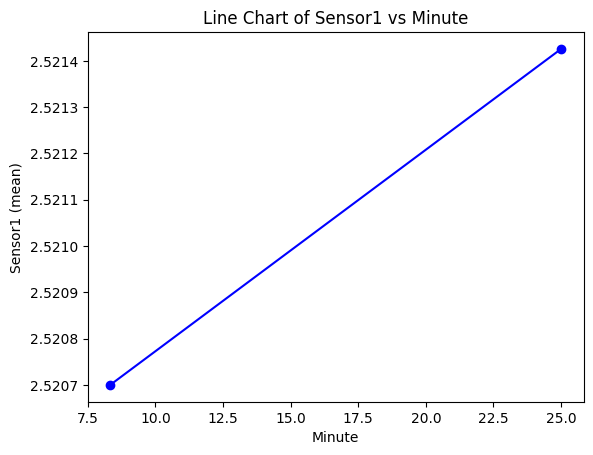

In [272]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df2.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [273]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['minute'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute
df2['second'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df2 = df2.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df2)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.519358  2.429675  41:31.000000   8.332031         0.0   
1      2.519358  2.429839  41:31.000000   8.332031         0.0   
2      2.521165  2.430496  41:31.000000   8.332031         0.0   
3      2.520508  2.428853  41:31.000000   8.332031         0.0   
4      2.519358  2.428689  41:31.000000   8.332031         0.0   
...         ...       ...           ...        ...         ...   
74996  2.514267  2.431317  59:12.000000  25.000000         0.0   
74997  2.531349  2.423433  59:12.000000  25.000000         0.0   
74998  2.510653  2.433288  59:12.000000  25.000000         0.0   
74999  2.525272  2.431974  59:12.000000  25.000000         0.0   
77233  2.518537  2.426882           NaN        NaN         NaN   

      gear_fault_desc  time_x_seconds  minute  second  
0          Root crack          2491.0    41.0    31.0  
1          Root crack          2491.0    41.0    31.0  
2          Root crack          2491.0  

In [274]:
sorted_df2 = df2.sort_values(by='minute')
sorted_df2 = df2.sort_values(by='second')

In [275]:
sorted_df2.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
52230,2.520016,2.433453,59:07.400000,25.0,0.0,Root crack,3547.4,59.0,7.0
53173,2.518537,2.430660,59:07.600000,25.0,0.0,Root crack,3547.6,59.0,7.0
53172,2.522315,2.429018,59:07.600000,25.0,0.0,Root crack,3547.6,59.0,7.0
53171,2.523136,2.430989,59:07.600000,25.0,0.0,Root crack,3547.6,59.0,7.0
53170,2.519358,2.431974,59:07.600000,25.0,0.0,Root crack,3547.6,59.0,7.0


In [276]:
df2 = sorted_df2

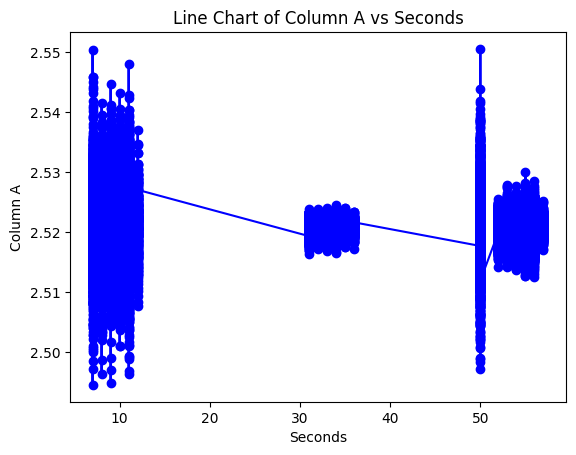

In [277]:
plt.plot(df2['second'], df2['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

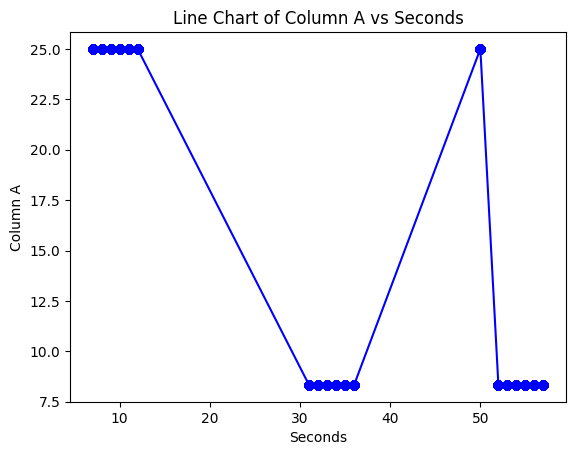

In [278]:
plt.plot(df2['second'], df2['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [279]:
df2.tail()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
49841,2.519851,2.430332,41:57.000000,8.332031,80.0,Root crack,2517.0,41.0,57.0
49842,2.520016,2.430496,41:57.000000,8.332031,80.0,Root crack,2517.0,41.0,57.0
49829,2.522808,2.429511,41:57.000000,8.332031,80.0,Root crack,2517.0,41.0,57.0
49998,2.522315,2.428525,41:57.000000,8.332031,80.0,Root crack,2517.0,41.0,57.0
77233,2.518537,2.426882,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
print(df2.dtypes)

sensor1            float64
sensor2            float64
time_x              object
speedSet           float64
load_value         float64
gear_fault_desc     object
time_x_seconds     float64
minute             float64
second             float64
dtype: object


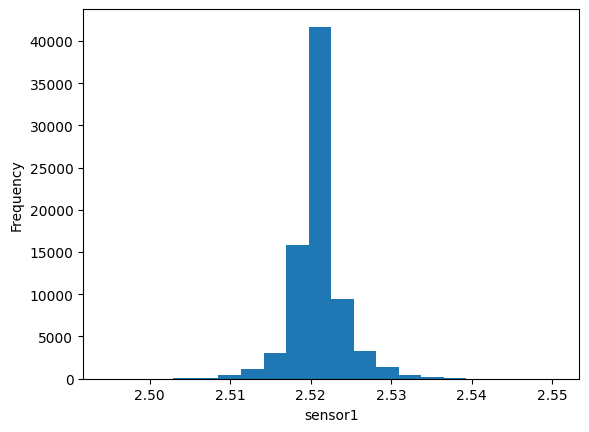

In [281]:
# Distribution of numerical columns
plt.hist(df2['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

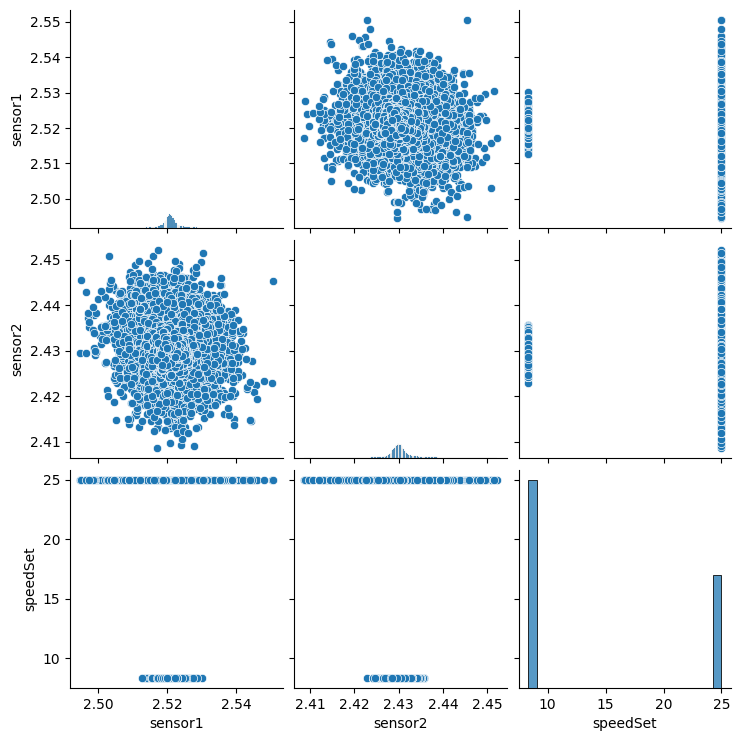

In [282]:
# Relationships between variables
sns.pairplot(df2[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [283]:
# Select only numeric columns
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])

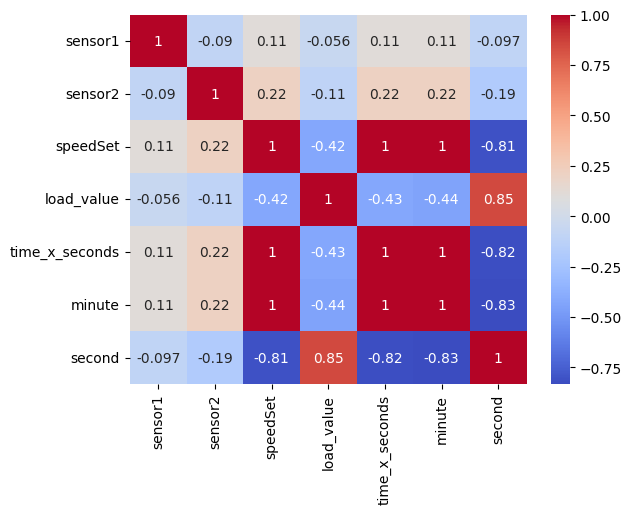

In [284]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [285]:
print(df2['time_x'].iloc[0])

59:07.400000


# **SURFACE FAULT**

In [286]:
df3 = pd.read_csv('/content/surface_fault.csv')

In [287]:
print(df3)

        sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0      2.521001  2.427539  35:14.0   8.332031           0  surface defect
1      2.519851  2.428196  35:14.0   8.332031           0  surface defect
2      2.520016  2.426225  35:14.0   8.332031           0  surface defect
3      2.520016  2.428689  35:14.0   8.332031           0  surface defect
4      2.521165  2.427047  35:14.0   8.332031           0  surface defect
...         ...       ...      ...        ...         ...             ...
51527  2.515909  2.422283  29:41.3  25.000000           0  surface defect
51528  2.515416  2.432139  29:41.3  25.000000           0  surface defect
51529  2.518701  2.426718  29:41.3  25.000000           0  surface defect
51530  2.508189  2.420641  29:41.3  25.000000           0  surface defect
51531  2.520673  2.431482  29:41.3  25.000000           0        surface 

[51532 rows x 6 columns]


In [288]:
print(df3.head())

    sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0  2.521001  2.427539  35:14.0  8.332031           0  surface defect
1  2.519851  2.428196  35:14.0  8.332031           0  surface defect
2  2.520016  2.426225  35:14.0  8.332031           0  surface defect
3  2.520016  2.428689  35:14.0  8.332031           0  surface defect
4  2.521165  2.427047  35:14.0  8.332031           0  surface defect


In [289]:
df3['time_x'].head()

0    35:14.0
1    35:14.0
2    35:14.0
3    35:14.0
4    35:14.0
Name: time_x, dtype: object

In [290]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['time_x'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [291]:
# Convert 'time_x' to seconds
df3['time_x_seconds'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df3 = df3[(df3['time_x_seconds'] >= 39) & (df3['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df3)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [292]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51532 entries, 0 to 51531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor1          51532 non-null  float64
 1   sensor2          51532 non-null  float64
 2   time_x           51532 non-null  object 
 3   speedSet         51532 non-null  float64
 4   load_value       51532 non-null  int64  
 5   gear_fault_desc  51532 non-null  object 
 6   time_x_seconds   51532 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ MB


In [293]:
# Remove rows with NaN values
df3_cleaned = df3.dropna()
print(df3_cleaned)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.521001  2.427539  31:39.000000   8.332031           0   
1      2.519851  2.428196  31:39.000000   8.332031           0   
2      2.520016  2.426225  31:39.000000   8.332031           0   
3      2.520016  2.428689  31:39.000000   8.332031           0   
4      2.521165  2.427047  31:39.000000   8.332031           0   
...         ...       ...           ...        ...         ...   
51527  2.515909  2.422283  20:00.300000  25.000000           0   
51528  2.515416  2.432139  20:00.300000  25.000000           0   
51529  2.518701  2.426718  20:00.300000  25.000000           0   
51530  2.508189  2.420641  20:00.300000  25.000000           0   
51531  2.520673  2.431482  20:00.300000  25.000000           0   

      gear_fault_desc  time_x_seconds  
0      surface defect          1899.0  
1      surface defect          1899.0  
2      surface defect          1899.0  
3      surface defect          1899.0  
4      

In [294]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['minute'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df3['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
20     1532
31    25000
34    25000
Name: count, dtype: int64


In [295]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df3['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
20     1532
31    25000
34    25000
Name: count, dtype: int64


In [296]:
df3['minute'].value_counts().sort_index()

minute
20     1532
31    25000
34    25000
Name: count, dtype: int64

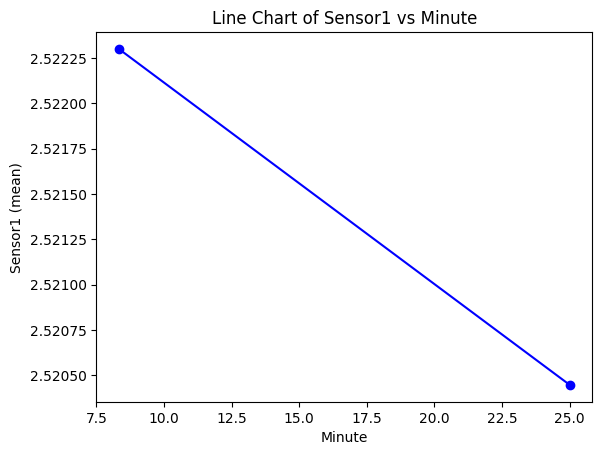

In [297]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [298]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['minute'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute
df3['second'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df3 = df3.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df3)

        sensor1   sensor2        time_x   speedSet  load_value  \
50000  2.528393  2.438709  20:00.000000  25.000000           0   
50001  2.521494  2.439859  20:00.000000  25.000000           0   
50002  2.513117  2.411442  20:00.000000  25.000000           0   
50003  2.529214  2.419327  20:00.000000  25.000000           0   
50004  2.511638  2.428032  20:00.000000  25.000000           0   
...         ...       ...           ...        ...         ...   
49995  2.517223  2.429675  34:22.000000   8.332031          80   
49996  2.521822  2.428853  34:22.000000   8.332031          80   
49997  2.517387  2.428361  34:22.000000   8.332031          80   
49998  2.519358  2.429182  34:22.000000   8.332031          80   
49999  2.518701  2.429182  34:22.000000   8.332031          80   

      gear_fault_desc  time_x_seconds  minute  second  
50000  surface defect          1200.0      20       0  
50001  surface defect          1200.0      20       0  
50002  surface defect          1200.0  

In [299]:
df3 = sorted_df3

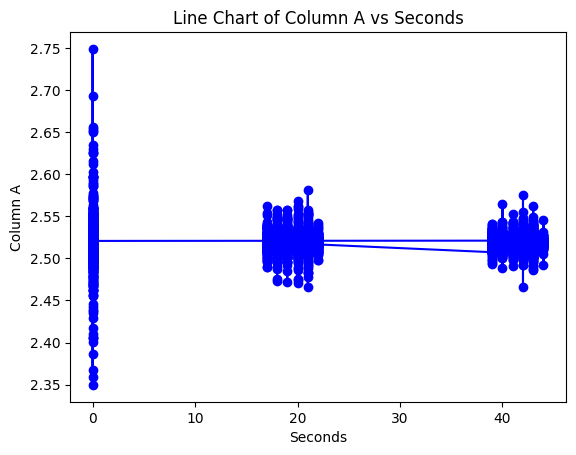

In [300]:
plt.plot(df3['second'], df3['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

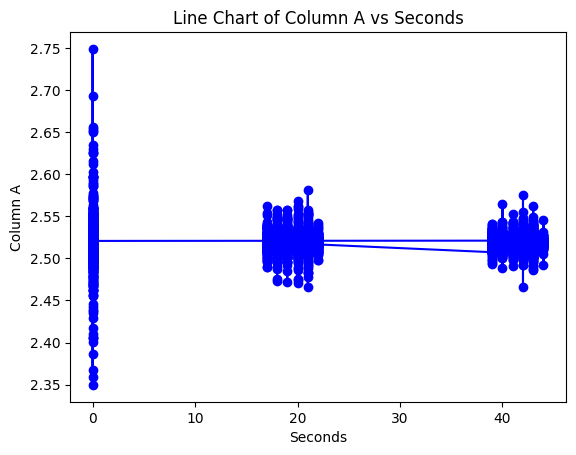

In [301]:
plt.plot(df3['second'], df3['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

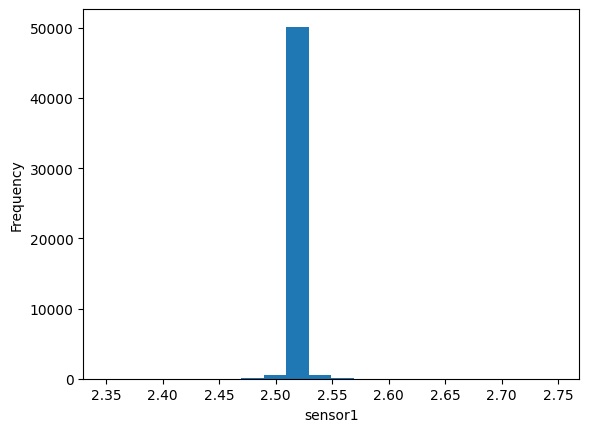

In [302]:
# Distribution of numerical columns
plt.hist(df3['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

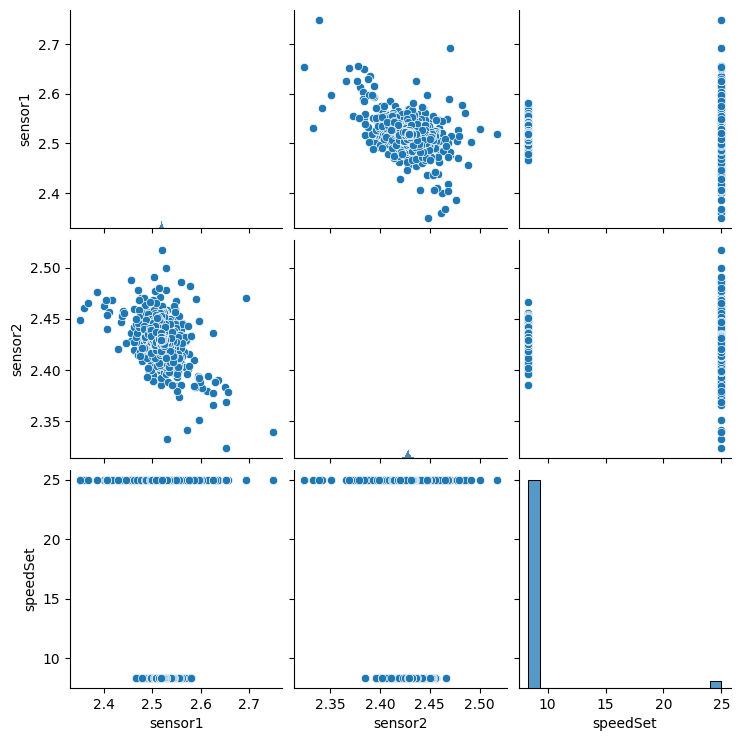

In [303]:
# Relationships between variables
sns.pairplot(df3[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [304]:
# Select only numeric columns
numeric_cols = df3.select_dtypes(include=['float64', 'int64'])

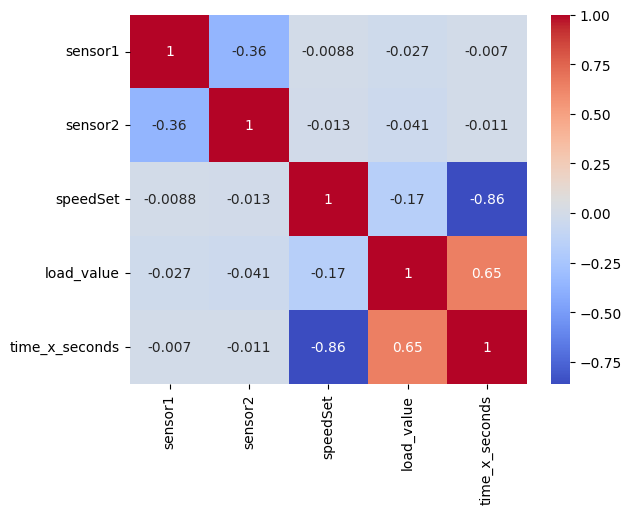

In [305]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [306]:
print(df3['time_x'].iloc[0])

20:00.000000


# **TOOTH CHIPPED FAULT**

In [307]:
df4 = pd.read_csv('/content/tooth_chipped_fault.csv')

In [308]:
print(df4)

        sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0      2.518209  2.430496  53:07.0  8.332031         0.0   chipped tooth
1      2.517880  2.429839  53:07.0  8.332031         0.0   chipped tooth
2      2.516402  2.427211  53:07.0  8.332031         0.0   chipped tooth
3      2.518537  2.427704  53:07.0  8.332031         0.0   chipped tooth
4      2.518701  2.427539  53:07.0  8.332031         0.0   chipped tooth
...         ...       ...      ...       ...         ...             ...
34895  2.518373  2.432960  04:31.0  8.332031        80.0   chipped tooth
34896  2.519851  2.431974  04:31.0  8.332031        80.0   chipped tooth
34897  2.520344  2.429839  04:31.0  8.332031        80.0   chipped tooth
34898  2.518537  2.432303  04:31.0  8.332031        80.0   chipped tooth
34899  2.518373  2.428032  04:31.0  8.332000         NaN             NaN

[34900 rows x 6 columns]


In [309]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['time_x'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [310]:
# Convert 'time_x' to seconds
df4['time_x_seconds'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df4 = df4[(df4['time_x_seconds'] >= 39) & (df4['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df4)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [311]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34900 entries, 0 to 34899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor1          34900 non-null  float64
 1   sensor2          34900 non-null  float64
 2   time_x           34900 non-null  object 
 3   speedSet         34900 non-null  float64
 4   load_value       34899 non-null  float64
 5   gear_fault_desc  34899 non-null  object 
 6   time_x_seconds   34900 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.9+ MB


In [312]:
# Remove rows with NaN values
df4_cleaned = df4.dropna()
print(df4_cleaned)

        sensor1   sensor2        time_x  speedSet  load_value gear_fault_desc  \
0      2.518209  2.430496  53:07.000000  8.332031         0.0   chipped tooth   
1      2.517880  2.429839  53:07.000000  8.332031         0.0   chipped tooth   
2      2.516402  2.427211  53:07.000000  8.332031         0.0   chipped tooth   
3      2.518537  2.427704  53:07.000000  8.332031         0.0   chipped tooth   
4      2.518701  2.427539  53:07.000000  8.332031         0.0   chipped tooth   
...         ...       ...           ...       ...         ...             ...   
34894  2.517552  2.428689  04:31.000000  8.332031        80.0   chipped tooth   
34895  2.518373  2.432960  04:31.000000  8.332031        80.0   chipped tooth   
34896  2.519851  2.431974  04:31.000000  8.332031        80.0   chipped tooth   
34897  2.520344  2.429839  04:31.000000  8.332031        80.0   chipped tooth   
34898  2.518537  2.432303  04:31.000000  8.332031        80.0   chipped tooth   

       time_x_seconds  
0  

In [313]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['minute'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df4['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
4      9900
53    25000
Name: count, dtype: int64


In [314]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df4['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
4      9900
53    25000
Name: count, dtype: int64


In [315]:
df4['minute'].value_counts().sort_index()

minute
4      9900
53    25000
Name: count, dtype: int64

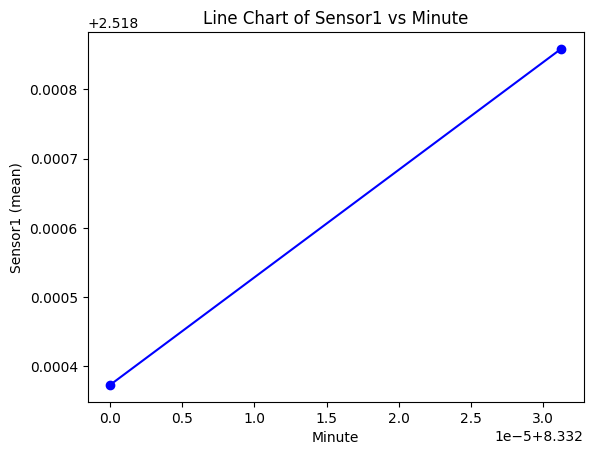

In [316]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df4.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [317]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['minute'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute
df4['second'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df4 = df4.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df4)

        sensor1   sensor2        time_x  speedSet  load_value gear_fault_desc  \
25000  2.519194  2.430496  04:29.000000  8.332031        80.0   chipped tooth   
25001  2.519194  2.430989  04:29.000000  8.332031        80.0   chipped tooth   
25002  2.520016  2.431317  04:29.000000  8.332031        80.0   chipped tooth   
25003  2.519358  2.430496  04:29.000000  8.332031        80.0   chipped tooth   
25004  2.519030  2.430989  04:29.000000  8.332031        80.0   chipped tooth   
...         ...       ...           ...       ...         ...             ...   
24995  2.516895  2.428361  53:12.000000  8.332031         0.0   chipped tooth   
24996  2.519030  2.429018  53:12.000000  8.332031         0.0   chipped tooth   
24997  2.519030  2.426882  53:12.000000  8.332031         0.0   chipped tooth   
24998  2.518209  2.430003  53:12.000000  8.332031         0.0   chipped tooth   
24999  2.518373  2.426718  53:12.000000  8.332031         0.0   chipped tooth   

       time_x_seconds  minu

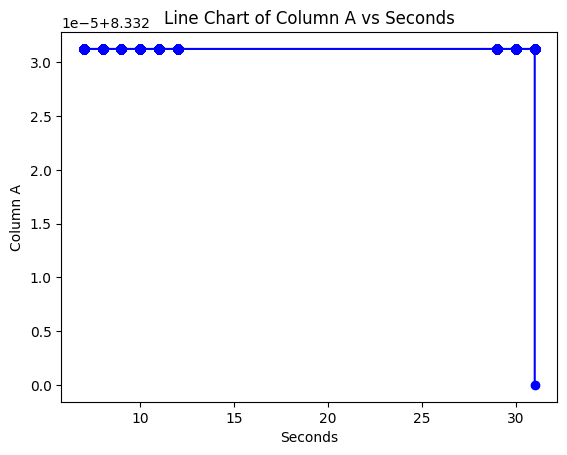

In [318]:
plt.plot(df4['second'], df4['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

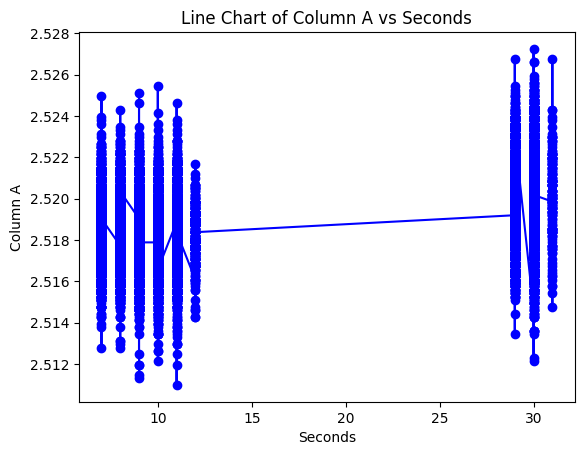

In [319]:
plt.plot(df4['second'], df4['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [320]:
#Missing values
print(df4.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         1
gear_fault_desc    1
time_x_seconds     0
minute             0
second             0
dtype: int64


In [321]:
# Unique values for categorical columns
print(df4['gear_fault_desc'].nunique())

1


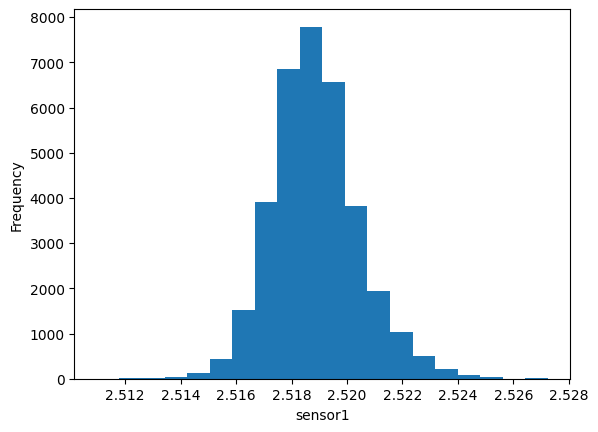

In [322]:
# Distribution of numerical columns
plt.hist(df4['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

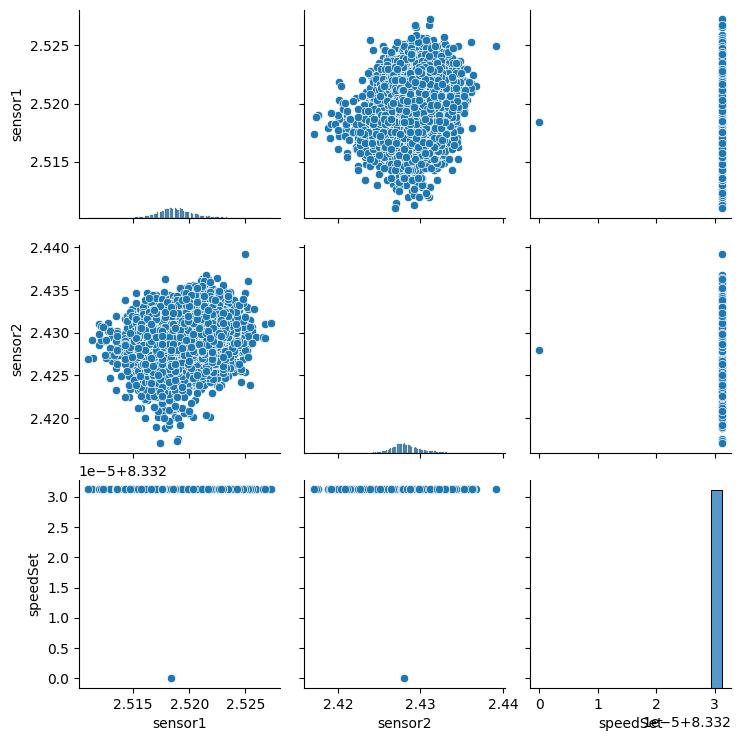

In [323]:
# Relationships between variables
sns.pairplot(df4[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [324]:
# Select only numeric columns
numeric_cols = df4.select_dtypes(include=['float64', 'int64'])

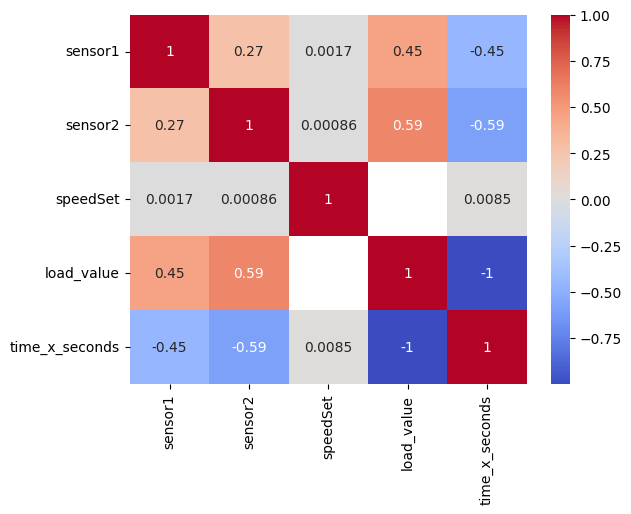

In [325]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [326]:
print(df4['time_x'].iloc[0])

53:07.000000


# **MISSING TOOTH**

In [327]:
df5 = pd.read_csv('/content/missing_tooth.csv')

In [328]:
print(df5)

        sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0      2.520016  2.430496  06:37.0  8.332031         0.0   missing tooth
1      2.521822  2.430660  06:37.0  8.332031         0.0   missing tooth
2      2.519194  2.429511  06:37.0  8.332031         0.0   missing tooth
3      2.519851  2.428853  06:37.0  8.332031         0.0   missing tooth
4      2.518701  2.429346  06:37.0  8.332031         0.0   missing tooth
...         ...       ...      ...       ...         ...             ...
34908  2.518537  2.430332  07:25.0  8.332031        80.0   missing tooth
34909  2.518209  2.431153  07:25.0  8.332031        80.0   missing tooth
34910  2.516566  2.432467  07:25.0  8.332031        80.0   missing tooth
34911  2.518537  2.429018  07:25.0  8.332031        80.0   missing tooth
34912  2.518866  2.430168  07:25.0       NaN         NaN             NaN

[34913 rows x 6 columns]


In [329]:
# Remove rows with NaN values
df5_cleaned = df5.dropna()
print(df5_cleaned)

        sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0      2.520016  2.430496  06:37.0  8.332031         0.0   missing tooth
1      2.521822  2.430660  06:37.0  8.332031         0.0   missing tooth
2      2.519194  2.429511  06:37.0  8.332031         0.0   missing tooth
3      2.519851  2.428853  06:37.0  8.332031         0.0   missing tooth
4      2.518701  2.429346  06:37.0  8.332031         0.0   missing tooth
...         ...       ...      ...       ...         ...             ...
34907  2.519687  2.431317  07:25.0  8.332031        80.0   missing tooth
34908  2.518537  2.430332  07:25.0  8.332031        80.0   missing tooth
34909  2.518209  2.431153  07:25.0  8.332031        80.0   missing tooth
34910  2.516566  2.432467  07:25.0  8.332031        80.0   missing tooth
34911  2.518537  2.429018  07:25.0  8.332031        80.0   missing tooth

[34912 rows x 6 columns]


In [330]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['time_x'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [331]:
# Convert 'time_x' to seconds
df5['time_x_seconds'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df5 = df5[(df5['time_x_seconds'] >= 39) & (df5['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df5)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [332]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['minute'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df5['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
6    25000
7     9913
Name: count, dtype: int64


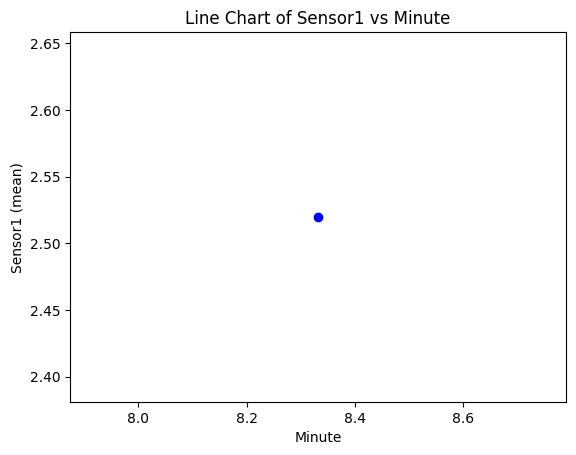

In [333]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df5.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [334]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['minute'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute
df5['second'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df5 = df5.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df5)

        sensor1   sensor2        time_x  speedSet  load_value gear_fault_desc  \
0      2.520016  2.430496  06:37.000000  8.332031         0.0   missing tooth   
1      2.521822  2.430660  06:37.000000  8.332031         0.0   missing tooth   
2      2.519194  2.429511  06:37.000000  8.332031         0.0   missing tooth   
3      2.519851  2.428853  06:37.000000  8.332031         0.0   missing tooth   
4      2.518701  2.429346  06:37.000000  8.332031         0.0   missing tooth   
...         ...       ...           ...       ...         ...             ...   
34908  2.518537  2.430332  07:25.000000  8.332031        80.0   missing tooth   
34909  2.518209  2.431153  07:25.000000  8.332031        80.0   missing tooth   
34910  2.516566  2.432467  07:25.000000  8.332031        80.0   missing tooth   
34911  2.518537  2.429018  07:25.000000  8.332031        80.0   missing tooth   
34912  2.518866  2.430168  07:25.000000       NaN         NaN             NaN   

       time_x_seconds  minu

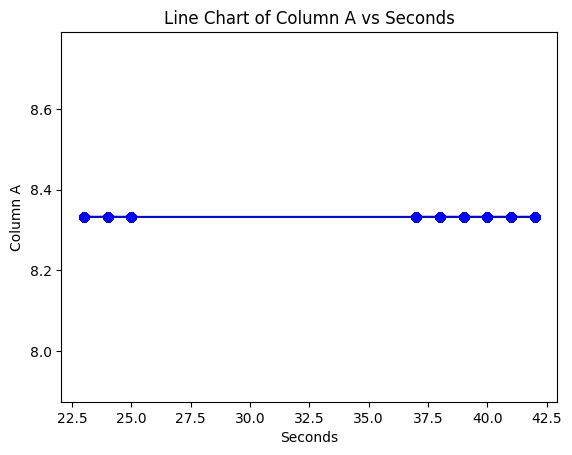

In [335]:
plt.plot(df5['second'], df5['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [336]:
#Missing values
print(df5.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           1
load_value         1
gear_fault_desc    1
time_x_seconds     0
minute             0
second             0
dtype: int64


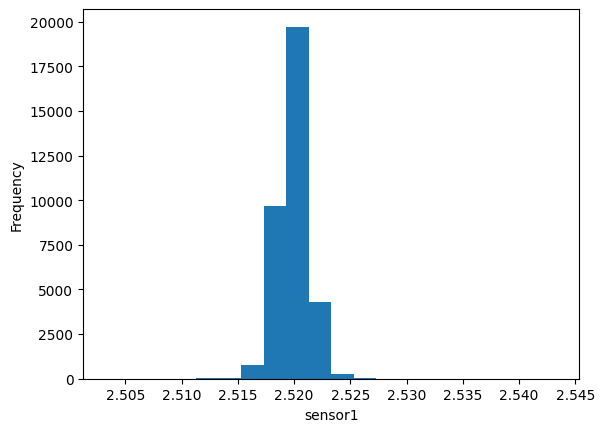

In [337]:
# Distribution of numerical columns
plt.hist(df5['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

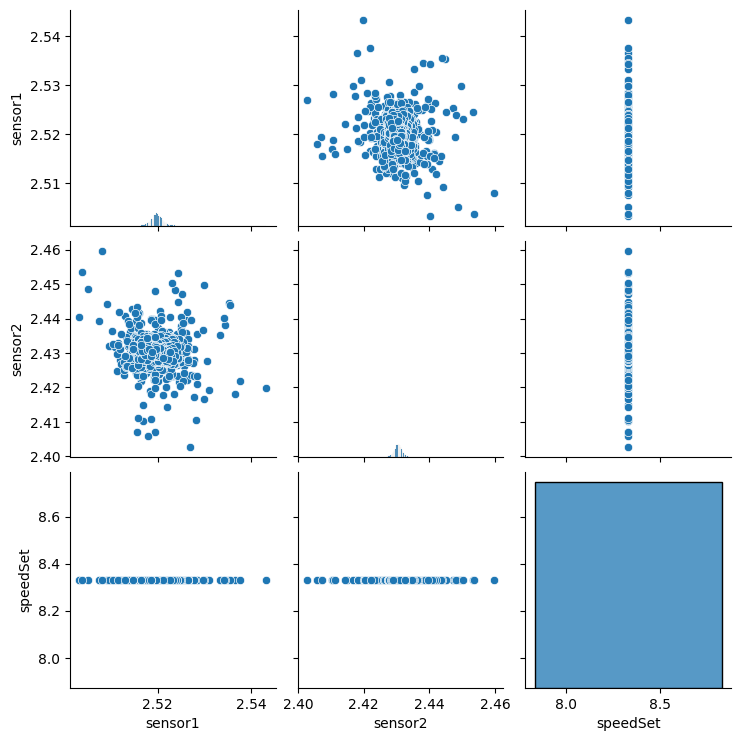

In [338]:
# Relationships between variables
sns.pairplot(df5[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [339]:
# Select only numeric columns
numeric_cols = df5.select_dtypes(include=['float64', 'int64'])

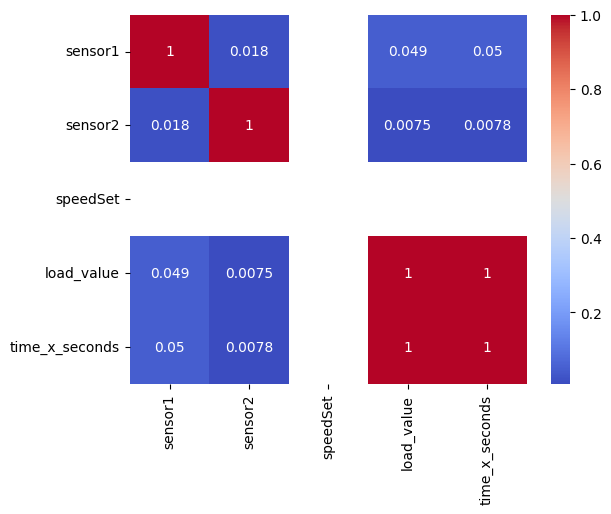

In [340]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [341]:
print(df5['time_x'].iloc[0])

06:37.000000


# **NO FAULT**

In [342]:
df6 = pd.read_csv('/content/no_fault.csv')

In [343]:
print(df6)

        sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0      2.523465  2.430168  47:31.0   8.332031           0        No fault
1      2.521494  2.430003  47:31.0   8.332031           0        No fault
2      2.522479  2.429675  47:31.0   8.332031           0        No fault
3      2.521330  2.431810  47:31.0   8.332031           0        No fault
4      2.522479  2.431317  47:31.0   8.332031           0        No fault
...         ...       ...      ...        ...         ...             ...
80453  2.511310  2.429839  30:02.1  25.000000          80        No fault
80454  2.524943  2.428196  30:02.1  25.000000          80        No fault
80455  2.522808  2.413249  30:02.1  25.000000          80        No fault
80456  2.531513  2.429511  30:02.1  25.000000          80        No fault
80457  2.514267  2.425733  30:02.1  25.000000          80               N

[80458 rows x 6 columns]


In [344]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['time_x'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [345]:
# Convert 'time_x' to seconds
df6['time_x_seconds'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df6 = df6[(df6['time_x_seconds'] >= 39) & (df6['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df6)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [346]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80458 entries, 0 to 80457
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor1          80458 non-null  float64
 1   sensor2          80458 non-null  float64
 2   time_x           80458 non-null  object 
 3   speedSet         80458 non-null  float64
 4   load_value       80458 non-null  int64  
 5   gear_fault_desc  80458 non-null  object 
 6   time_x_seconds   80458 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.3+ MB


In [347]:
# Remove rows with NaN values
df6_cleaned = df6.dropna()
print(df6_cleaned)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.523465  2.430168  47:31.000000   8.332031           0   
1      2.521494  2.430003  47:31.000000   8.332031           0   
2      2.522479  2.429675  47:31.000000   8.332031           0   
3      2.521330  2.431810  47:31.000000   8.332031           0   
4      2.522479  2.431317  47:31.000000   8.332031           0   
...         ...       ...           ...        ...         ...   
80453  2.511310  2.429839  30:02.100000  25.000000          80   
80454  2.524943  2.428196  30:02.100000  25.000000          80   
80455  2.522808  2.413249  30:02.100000  25.000000          80   
80456  2.531513  2.429511  30:02.100000  25.000000          80   
80457  2.514267  2.425733  30:02.100000  25.000000          80   

      gear_fault_desc  time_x_seconds  
0            No fault          2851.0  
1            No fault          2851.0  
2            No fault          2851.0  
3            No fault          2851.0  
4      

In [348]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['minute'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df6['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
29    25000
30     5458
47    25000
49    25000
Name: count, dtype: int64


In [349]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df6['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
29    25000
30     5458
47    25000
49    25000
Name: count, dtype: int64


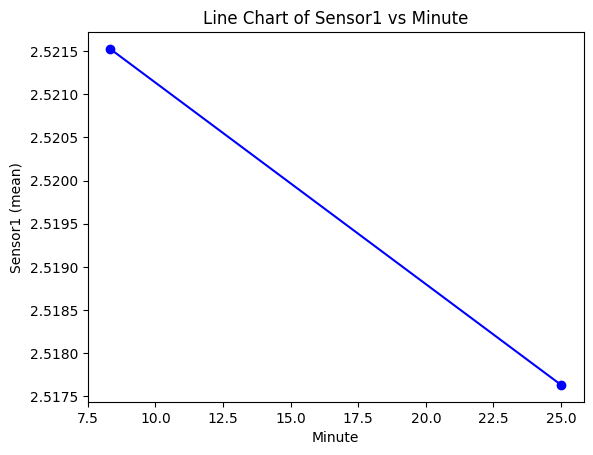

In [350]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df6.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [351]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['minute'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute
df6['second'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df6 = df6.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df6)

        sensor1   sensor2        time_x   speedSet  load_value  \
50000  2.518537  2.426718  29:24.000000  25.000000           0   
50001  2.516566  2.430660  29:24.000000  25.000000           0   
50002  2.515416  2.427211  29:24.000000  25.000000           0   
50003  2.515909  2.429346  29:24.000000  25.000000           0   
50004  2.521165  2.426390  29:24.000000  25.000000           0   
...         ...       ...           ...        ...         ...   
49995  2.522151  2.429839  49:13.000000   8.332031          80   
49996  2.520508  2.431153  49:13.000000   8.332031          80   
49997  2.522479  2.432139  49:13.000000   8.332031          80   
49998  2.520673  2.430825  49:13.000000   8.332031          80   
49999  2.523629  2.430332  49:13.000000   8.332031          80   

      gear_fault_desc  time_x_seconds  minute  second  
50000        No fault          1764.0      29      24  
50001        No fault          1764.0      29      24  
50002        No fault          1764.0  

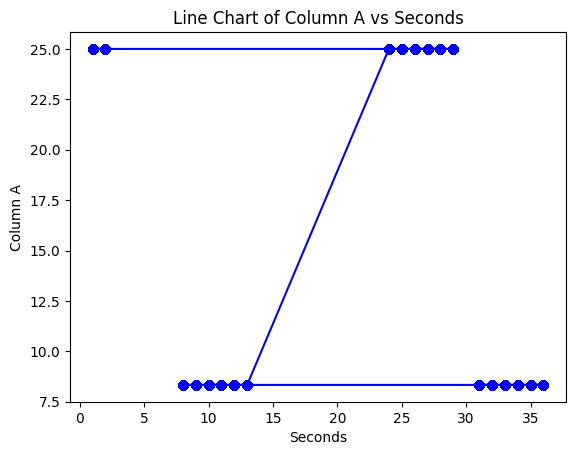

In [352]:
plt.plot(df6['second'], df6['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

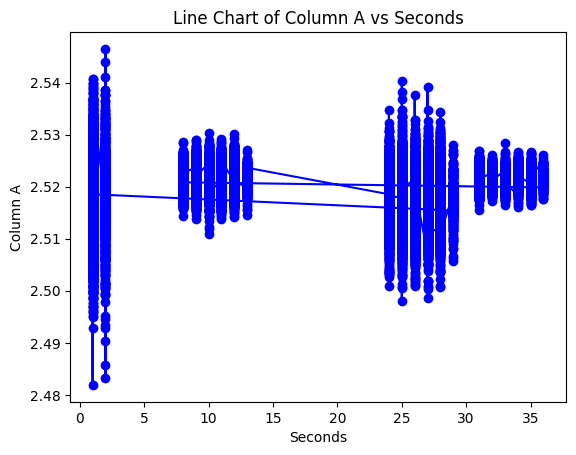

In [353]:
plt.plot(df6['second'], df6['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [354]:
#Missing values
print(df6.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


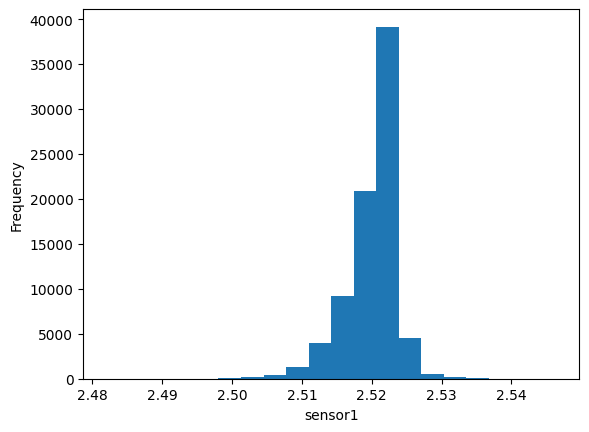

In [355]:
# Distribution of numerical columns
plt.hist(df6['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

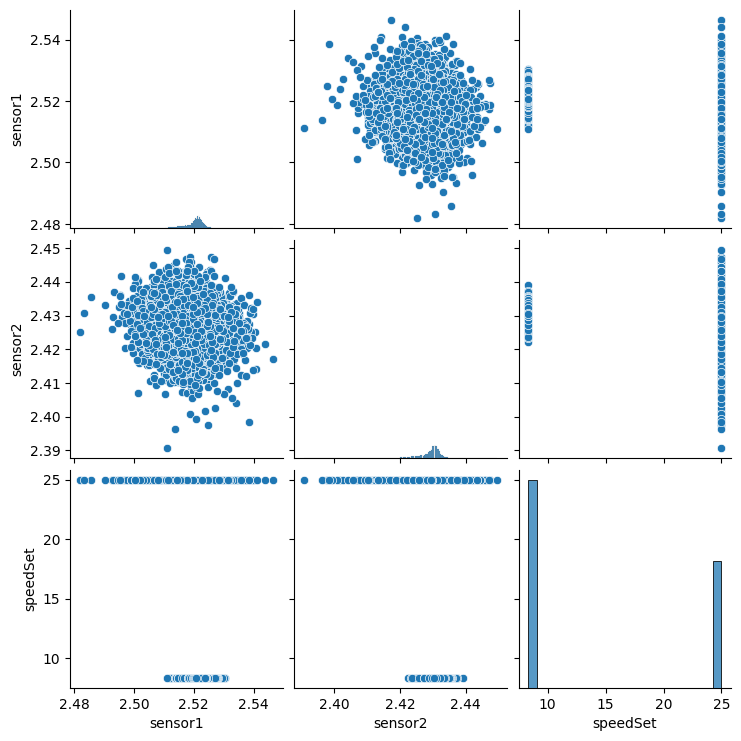

In [356]:
# Relationships between variables
sns.pairplot(df6[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [357]:
# Select only numeric columns
numeric_cols = df6.select_dtypes(include=['float64', 'int64'])

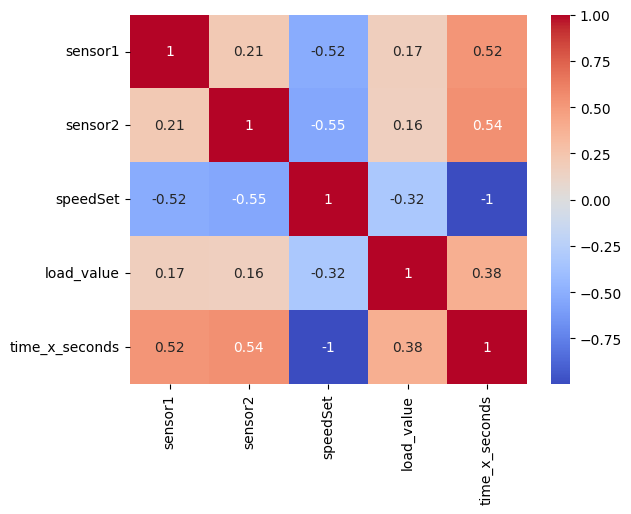

In [358]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [359]:
print(df6['time_x'].iloc[0])

47:31.000000


# **Model Implementation**

In [360]:
import pandas as pd
import numpy as np

In [361]:
df_esc = pd.read_csv('/content/eccentricity.csv')
df_mis_tooth = pd.read_csv('/content/missing_tooth.csv')
df_no_fault = pd.read_csv('/content/no_fault.csv')

In [362]:
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [363]:
df_esc['time_x'].head()

0    31:39.0
1    31:39.0
2    31:39.0
3    31:39.0
4    31:39.0
Name: time_x, dtype: object

In [364]:
df_esc['time_x'] = pd.to_datetime(df_esc['time_x'], format='%M:%S.%f')


df_esc['day'] = df_esc['time_x'].dt.day
df_esc['month'] = df_esc['time_x'].dt.month
df_esc['year'] = df_esc['time_x'].dt.year
df_esc['hour'] = df_esc['time_x'].dt.hour
df_esc['minute'] = df_esc['time_x'].dt.minute
df_esc['second'] = df_esc['time_x'].dt.second + df_esc['time_x'].dt.microsecond / 1e6
df_esc['second_str'] = df_esc['time_x'].dt.strftime('%S.%f')

In [365]:
df_mis_tooth['time_x'] = pd.to_datetime(df_mis_tooth['time_x'], format='%M:%S.%f')




df_mis_tooth['day'] = df_mis_tooth['time_x'].dt.day
df_mis_tooth['month'] = df_mis_tooth['time_x'].dt.month
df_mis_tooth['year'] = df_mis_tooth['time_x'].dt.year
df_mis_tooth['hour'] = df_mis_tooth['time_x'].dt.hour
df_mis_tooth['minute'] = df_mis_tooth['time_x'].dt.minute
df_mis_tooth['second'] = df_mis_tooth['time_x'].dt.second + df_mis_tooth['time_x'].dt.microsecond / 1e6


df_mis_tooth['second_str'] = df_mis_tooth['time_x'].dt.strftime('%S.%f')

In [366]:
df_no_fault['time_x'] = pd.to_datetime(df_no_fault['time_x'], format='%M:%S.%f')




df_no_fault['day'] = df_no_fault['time_x'].dt.day
df_no_fault['month'] = df_no_fault['time_x'].dt.month
df_no_fault['year'] = df_no_fault['time_x'].dt.year
df_no_fault['hour'] = df_no_fault['time_x'].dt.hour
df_no_fault['minute'] = df_no_fault['time_x'].dt.minute
df_no_fault['second'] = df_no_fault['time_x'].dt.second + df_no_fault['time_x'].dt.microsecond / 1e6


df_no_fault['second_str'] = df_no_fault['time_x'].dt.strftime('%S.%f')

In [367]:
df_esc.shape

(53569, 13)

In [368]:
# Remove rows with NaN values
df_esc_cleaned = df_esc.dropna()
print(df_esc_cleaned)

        sensor1   sensor2                  time_x   speedSet  load_value  \
0      2.522315  2.431974 1900-01-01 00:31:39.000   8.332031           0   
1      2.523629  2.431317 1900-01-01 00:31:39.000   8.332031           0   
2      2.522644  2.428032 1900-01-01 00:31:39.000   8.332031           0   
3      2.521987  2.430660 1900-01-01 00:31:39.000   8.332031           0   
4      2.522808  2.430168 1900-01-01 00:31:39.000   8.332031           0   
...         ...       ...                     ...        ...         ...   
53564  2.523301  2.431974 1900-01-01 00:20:00.700  25.000000           0   
53565  2.521494  2.428853 1900-01-01 00:20:00.700  25.000000           0   
53566  2.520344  2.425568 1900-01-01 00:20:00.700  25.000000           0   
53567  2.521165  2.427868 1900-01-01 00:20:00.700  25.000000           0   
53568  2.521822  2.428361 1900-01-01 00:20:00.700  25.000000           0   

      gear_fault_desc  day  month  year  hour  minute  second second_str  
0        ecc

In [369]:
df_mis_tooth.shape

(34913, 13)

In [370]:
# Remove rows with NaN values
df_mis_tooth_cleaned = df_mis_tooth.dropna()
print(df_mis_tooth_cleaned)

        sensor1   sensor2              time_x  speedSet  load_value  \
0      2.520016  2.430496 1900-01-01 00:06:37  8.332031         0.0   
1      2.521822  2.430660 1900-01-01 00:06:37  8.332031         0.0   
2      2.519194  2.429511 1900-01-01 00:06:37  8.332031         0.0   
3      2.519851  2.428853 1900-01-01 00:06:37  8.332031         0.0   
4      2.518701  2.429346 1900-01-01 00:06:37  8.332031         0.0   
...         ...       ...                 ...       ...         ...   
34907  2.519687  2.431317 1900-01-01 00:07:25  8.332031        80.0   
34908  2.518537  2.430332 1900-01-01 00:07:25  8.332031        80.0   
34909  2.518209  2.431153 1900-01-01 00:07:25  8.332031        80.0   
34910  2.516566  2.432467 1900-01-01 00:07:25  8.332031        80.0   
34911  2.518537  2.429018 1900-01-01 00:07:25  8.332031        80.0   

      gear_fault_desc  day  month  year  hour  minute  second second_str  
0       missing tooth    1      1  1900     0       6    37.0  37.000000

In [371]:
df_no_fault.shape

(80458, 13)

In [372]:
# Remove rows with NaN values
df_no_fault_cleaned = df_no_fault.dropna()
print(df_no_fault_cleaned)

        sensor1   sensor2                  time_x   speedSet  load_value  \
0      2.523465  2.430168 1900-01-01 00:47:31.000   8.332031           0   
1      2.521494  2.430003 1900-01-01 00:47:31.000   8.332031           0   
2      2.522479  2.429675 1900-01-01 00:47:31.000   8.332031           0   
3      2.521330  2.431810 1900-01-01 00:47:31.000   8.332031           0   
4      2.522479  2.431317 1900-01-01 00:47:31.000   8.332031           0   
...         ...       ...                     ...        ...         ...   
80453  2.511310  2.429839 1900-01-01 00:30:02.100  25.000000          80   
80454  2.524943  2.428196 1900-01-01 00:30:02.100  25.000000          80   
80455  2.522808  2.413249 1900-01-01 00:30:02.100  25.000000          80   
80456  2.531513  2.429511 1900-01-01 00:30:02.100  25.000000          80   
80457  2.514267  2.425733 1900-01-01 00:30:02.100  25.000000          80   

      gear_fault_desc  day  month  year  hour  minute  second second_str  
0           

In [373]:
print(df_esc.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [374]:
df_esc = df_esc.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [375]:
print(df_no_fault.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [376]:
columns_to_drop = ['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value', 'gear_fault_desc']
df_no_fault = df_no_fault.drop(columns_to_drop, axis=1)

In [377]:
df_mis_tooth = df_mis_tooth.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [378]:
df_esc_sorted = df_esc.sort_values(by='second')

In [379]:
df_esc_sorted.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50233,2.521494,2.427868,25.0,0,eccentricity,0.0,00.000000
50159,2.514431,2.428853,25.0,0,eccentricity,0.0,00.000000
50160,2.519194,2.427375,25.0,0,eccentricity,0.0,00.000000
50161,2.524286,2.427868,25.0,0,eccentricity,0.0,00.000000
50162,2.523793,2.428032,25.0,0,eccentricity,0.0,00.000000


In [380]:
df_esc_sorted

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50233,2.521494,2.427868,25.000000,0,eccentricity,0.0,00.000000
50159,2.514431,2.428853,25.000000,0,eccentricity,0.0,00.000000
50160,2.519194,2.427375,25.000000,0,eccentricity,0.0,00.000000
50161,2.524286,2.427868,25.000000,0,eccentricity,0.0,00.000000
50162,2.523793,2.428032,25.000000,0,eccentricity,0.0,00.000000
...,...,...,...,...,...,...,...
24855,2.521001,2.430660,8.332031,0,eccentricity,44.0,44.000000
24854,2.521987,2.431810,8.332031,0,eccentricity,44.0,44.000000
24853,2.522644,2.431646,8.332031,0,eccentricity,44.0,44.000000
24860,2.520837,2.430332,8.332031,0,eccentricity,44.0,44.000000


In [381]:
df_esc_sorted = df_esc_sorted.drop('second_str', axis=1)

In [382]:
print(df_esc_sorted.columns)

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_fault_desc',
       'second'],
      dtype='object')


In [383]:
group_numbers = (df_esc_sorted.index // 50) + 1

In [384]:
df_grouped = df_esc_sorted.groupby('gear_fault_desc').mean()

In [385]:
df_grouped = df_grouped.drop('second',axis=1)

In [386]:
df_grouped_esc = df_grouped

In [387]:
df_grouped_esc['gear_type'] = 'eccentric_load'

In [388]:
df_grouped_esc.head()

,sensor1,sensor2,speedSet,load_value,gear_type
gear_fault_desc,,,,,
eccentric,2.521822,2.428361,25.000000,0.000000,eccentric_load
eccentricity,2.522177,2.431495,9.442233,37.335723,eccentric_load


In [389]:
df_no_fault_sorted = df_no_fault.sort_values(by='second')

In [390]:
df_no_fault_sorted

,day,month,year,hour,minute,second,second_str
75203,1,1,1900,0,30,1.0,01.000000
75159,1,1,1900,0,30,1.0,01.000000
75160,1,1,1900,0,30,1.0,01.000000
75161,1,1,1900,0,30,1.0,01.000000
75162,1,1,1900,0,30,1.0,01.000000
...,...,...,...,...,...,...,...
24836,1,1,1900,0,47,36.0,36.000000
24837,1,1,1900,0,47,36.0,36.000000
24838,1,1,1900,0,47,36.0,36.000000
24825,1,1,1900,0,47,36.0,36.000000


In [391]:
print(df_no_fault_sorted.columns)

Index(['day', 'month', 'year', 'hour', 'minute', 'second', 'second_str'], dtype='object')


In [392]:
df_no_fault_sorted = df_no_fault_sorted.drop(['second_str'], axis=1)

In [393]:
group_numbers = (df_no_fault_sorted.index // 50) + 1

In [394]:
df_no_fault_grouped =df_no_fault_sorted.groupby(group_numbers).mean()

In [395]:
df_no_fault_grouped = df_no_fault_grouped.drop('second',axis=1)

In [396]:
df_no_fault_grouped['gear_type'] = 'no_fault'

In [397]:
df_no_fault_grouped

,day,month,year,hour,minute,gear_type
1,1.0,1.0,1900.0,0.0,47.0,no_fault
2,1.0,1.0,1900.0,0.0,47.0,no_fault
3,1.0,1.0,1900.0,0.0,47.0,no_fault
4,1.0,1.0,1900.0,0.0,47.0,no_fault
5,1.0,1.0,1900.0,0.0,47.0,no_fault
...,...,...,...,...,...,...
1606,1.0,1.0,1900.0,0.0,30.0,no_fault
1607,1.0,1.0,1900.0,0.0,30.0,no_fault
1608,1.0,1.0,1900.0,0.0,30.0,no_fault
1609,1.0,1.0,1900.0,0.0,30.0,no_fault


In [398]:
df_mis_tooth_sorted = df_mis_tooth.sort_values(by='second')

In [399]:
df_mis_tooth_sorted=df_mis_tooth_sorted.drop(['gear_fault_desc','second_str'],axis=1)

In [400]:
group_numbers = (df_mis_tooth_sorted.index // 50) + 1

In [401]:
df_mis_tooth_grouped =df_mis_tooth_sorted.groupby(group_numbers).mean()

In [402]:
df_mis_tooth_grouped = df_mis_tooth_grouped.drop('second',axis=1)

In [403]:
df_mis_tooth_grouped['gear_type'] = 'missing_tooth'

In [404]:
df_mis_tooth_grouped

,sensor1,sensor2,speedSet,load_value,gear_type
1,2.519230,2.429589,8.332031,0.0,missing_tooth
2,2.519381,2.430214,8.332031,0.0,missing_tooth
3,2.519884,2.430716,8.332031,0.0,missing_tooth
4,2.520104,2.430529,8.332031,0.0,missing_tooth
5,2.519953,2.430269,8.332031,0.0,missing_tooth
...,...,...,...,...,...
695,2.520262,2.430657,8.332031,80.0,missing_tooth
696,2.520485,2.430716,8.332031,80.0,missing_tooth
697,2.519986,2.430427,8.332031,80.0,missing_tooth
698,2.519234,2.430092,8.332031,80.0,missing_tooth


In [405]:
concatenated_df = pd.concat([df_grouped_esc, df_no_fault_grouped, df_mis_tooth_grouped], axis=0)

In [406]:
concatenated_df

,sensor1,sensor2,speedSet,load_value,gear_type,day,month,year,hour,minute
eccentric,2.521822,2.428361,25.000000,0.000000,eccentric_load,NaN,NaN,NaN,NaN,NaN
eccentricity,2.522177,2.431495,9.442233,37.335723,eccentric_load,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
2,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
3,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...
695,2.520262,2.430657,8.332031,80.000000,missing_tooth,NaN,NaN,NaN,NaN,NaN
696,2.520485,2.430716,8.332031,80.000000,missing_tooth,NaN,NaN,NaN,NaN,NaN
697,2.519986,2.430427,8.332031,80.000000,missing_tooth,NaN,NaN,NaN,NaN,NaN
698,2.519234,2.430092,8.332031,80.000000,missing_tooth,NaN,NaN,NaN,NaN,NaN


In [407]:
concatenated_df['gear_type'].unique()

array(['eccentric_load', 'no_fault', 'missing_tooth'], dtype=object)

In [408]:
x = concatenated_df[['sensor1','sensor2','speedSet','load_value']]

In [409]:
y = concatenated_df['gear_type']

In [410]:
import numpy as np

In [411]:
from sklearn.preprocessing import LabelEncoder, StandardScaler




label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
x = scaler.fit_transform(x)

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [413]:
df_no_fault.head()

,day,month,year,hour,minute,second,second_str
0,1,1,1900,0,47,31.0,31.000000
1,1,1,1900,0,47,31.0,31.000000
2,1,1,1900,0,47,31.0,31.000000
3,1,1,1900,0,47,31.0,31.000000
4,1,1,1900,0,47,31.0,31.000000


In [414]:
df_esc.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
0,2.522315,2.431974,8.332031,0,eccentricity,39.0,39.000000
1,2.523629,2.431317,8.332031,0,eccentricity,39.0,39.000000
2,2.522644,2.428032,8.332031,0,eccentricity,39.0,39.000000
3,2.521987,2.430660,8.332031,0,eccentricity,39.0,39.000000
4,2.522808,2.430168,8.332031,0,eccentricity,39.0,39.000000


In [415]:
df_mis_tooth.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
0,2.520016,2.430496,8.332031,0.0,missing tooth,37.0,37.000000
1,2.521822,2.430660,8.332031,0.0,missing tooth,37.0,37.000000
2,2.519194,2.429511,8.332031,0.0,missing tooth,37.0,37.000000
3,2.519851,2.428853,8.332031,0.0,missing tooth,37.0,37.000000
4,2.518701,2.429346,8.332031,0.0,missing tooth,37.0,37.000000


In [416]:
import pandas as pd

# Load the datasets
df_esc = pd.read_csv('/content/eccentricity.csv')
df_mis_tooth = pd.read_csv('/content/missing_tooth.csv')
df_no_fault = pd.read_csv('/content/no_fault.csv')

In [417]:
# Combine the three datasets
df_combined = pd.concat([df_esc, df_mis_tooth, df_no_fault])

In [456]:
# Assuming df_combined contains your combined dataset and 'gear_fault_desc' is your target variable
X = df_combined.drop('gear_fault_desc', axis=1)
y = df_combined['gear_fault_desc']

In [419]:
concatenated_df.columns

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_type', 'day',
       'month', 'year', 'hour', 'minute'],
      dtype='object')

In [459]:
X = concatenated_df.drop('gear_type', axis=1)  # Features (excluding the target column 'gear_type')
y = concatenated_df['gear_type']  # Target variable ('gear_type')

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [461]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an SVM classifier
svm_clf = SVC()

# Train the classifier on the training set
svm_clf.fit(X_train_imputed, y_train)

y_train_pred = svm_clf.predict(X_train_imputed)
y_pred = svm_clf.predict(X_test_imputed)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.6991341991341992
Testing Accuracy: 0.6868250539956804


In [475]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [463]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion Matrix - Training Set:")
print(conf_matrix_train)
print("\nConfusion Matrix - Testing Set:")
print(conf_matrix_test)

Confusion Matrix - Training Set:
[[   0    0    2]
 [   0    0  554]
 [   0    0 1292]]

Confusion Matrix - Testing Set:
[[  0 145]
 [  0 318]]


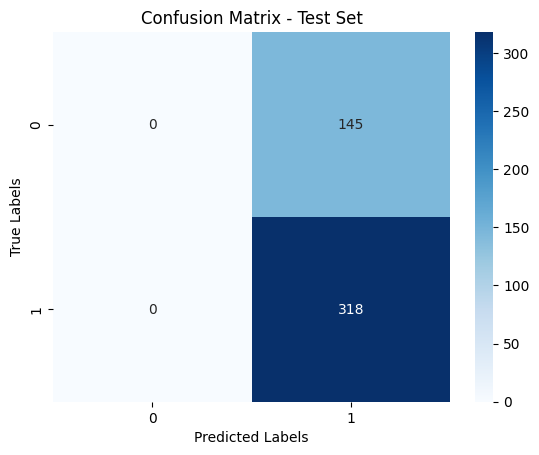

Classification Report - Test Set:
                precision    recall  f1-score   support

missing_tooth       0.00      0.00      0.00       145
     no_fault       0.69      1.00      0.81       318

     accuracy                           0.69       463
    macro avg       0.34      0.50      0.41       463
 weighted avg       0.47      0.69      0.56       463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [466]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate and print classification report for the test set
print("Classification Report - Test Set:\n", classification_report(y_test, y_pred))

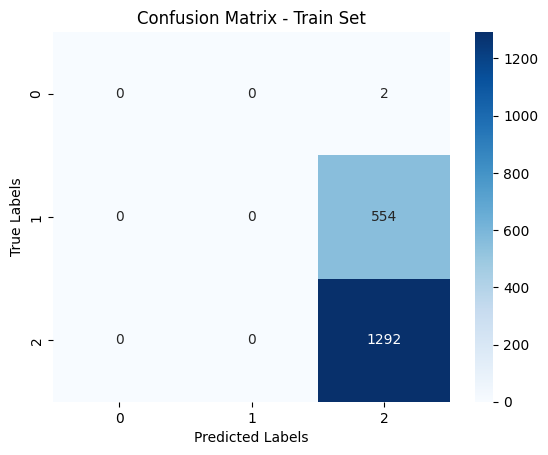

Classification Report - Test Set:
                 precision    recall  f1-score   support

eccentric_load       0.00      0.00      0.00         2
 missing_tooth       0.00      0.00      0.00       554
      no_fault       0.70      1.00      0.82      1292

      accuracy                           0.70      1848
     macro avg       0.23      0.33      0.27      1848
  weighted avg       0.49      0.70      0.58      1848



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [476]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate and print classification report for the test set
print("Classification Report - Test Set:\n", classification_report(y_train, y_train_pred))

NEXT 3 DATASET

In [467]:
df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

In [468]:
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [469]:
df_root_crack['time_x'].head()

0    41:31.0
1    41:31.0
2    41:31.0
3    41:31.0
4    41:31.0
Name: time_x, dtype: object

In [470]:
df_root_crack['time_x'] = pd.to_datetime(df_root_crack['time_x'], format='%M:%S.%f')

df_root_crack['day'] = df_root_crack['time_x'].dt.day
df_esc['month'] = df_root_crack['time_x'].dt.month
df_root_crack['year'] = df_root_crack['time_x'].dt.year
df_root_crack['hour'] = df_root_crack['time_x'].dt.hour
df_root_crack['minute'] = df_root_crack['time_x'].dt.minute
df_root_crack['second'] = df_root_crack['time_x'].dt.second + df_root_crack['time_x'].dt.microsecond / 1e6
df_root_crack['second_str'] = df_root_crack['time_x'].dt.strftime('%S.%f')


In [471]:
df_surface_fault['time_x'] = pd.to_datetime(df_surface_fault['time_x'], format='%M:%S.%f')


df_surface_fault['day'] = df_surface_fault['time_x'].dt.day
df_surface_fault['month'] = df_surface_fault['time_x'].dt.month
df_surface_fault['year'] = df_surface_fault['time_x'].dt.year
df_surface_fault['hour'] = df_surface_fault['time_x'].dt.hour
df_surface_fault['minute'] = df_surface_fault['time_x'].dt.minute
df_surface_fault['second'] = df_surface_fault['time_x'].dt.second + df_surface_fault['time_x'].dt.microsecond / 1e6


df_surface_fault['second_str'] = df_surface_fault['time_x'].dt.strftime('%S.%f')

In [472]:
df_tooth_chipped['time_x'] = pd.to_datetime(df_tooth_chipped['time_x'], format='%M:%S.%f')


df_tooth_chipped['day'] = df_tooth_chipped['time_x'].dt.day
df_tooth_chipped['month'] = df_tooth_chipped['time_x'].dt.month
df_tooth_chipped['year'] = df_tooth_chipped['time_x'].dt.year
df_tooth_chipped['hour'] = df_tooth_chipped['time_x'].dt.hour
df_tooth_chipped['minute'] = df_tooth_chipped['time_x'].dt.minute
df_tooth_chipped['second'] = df_tooth_chipped['time_x'].dt.second + df_tooth_chipped['time_x'].dt.microsecond / 1e6


df_tooth_chipped['second_str'] = df_tooth_chipped['time_x'].dt.strftime('%S.%f')

In [ ]:
df_root_crack.shape

In [477]:
# Remove rows with NaN values
df_root_crack_cleaned = df_root_crack.dropna()
print(df_root_crack_cleaned)

        sensor1   sensor2                  time_x   speedSet  load_value  \
0      2.519358  2.429675 1900-01-01 00:41:31.000   8.332031         0.0   
1      2.519358  2.429839 1900-01-01 00:41:31.000   8.332031         0.0   
2      2.521165  2.430496 1900-01-01 00:41:31.000   8.332031         0.0   
3      2.520508  2.428853 1900-01-01 00:41:31.000   8.332031         0.0   
4      2.519358  2.428689 1900-01-01 00:41:31.000   8.332031         0.0   
...         ...       ...                     ...        ...         ...   
77228  2.516566  2.435424 1900-01-01 00:55:50.400  25.000000        80.0   
77229  2.517716  2.446593 1900-01-01 00:55:50.400  25.000000        80.0   
77230  2.523958  2.423597 1900-01-01 00:55:50.400  25.000000        80.0   
77231  2.511967  2.439202 1900-01-01 00:55:50.400  25.000000        80.0   
77232  2.526914  2.416370 1900-01-01 00:55:50.400  25.000000        80.0   

      gear_fault_desc  day    year  hour  minute  second second_str  
0          Root c

In [478]:
df_surface_fault.shape

(51532, 13)

In [479]:
# Remove rows with NaN values
df_surface_fault_cleaned = df_surface_fault.dropna()
print(df_surface_fault_cleaned)

        sensor1   sensor2                  time_x   speedSet  load_value  \
0      2.521001  2.427539 1900-01-01 00:35:14.000   8.332031           0   
1      2.519851  2.428196 1900-01-01 00:35:14.000   8.332031           0   
2      2.520016  2.426225 1900-01-01 00:35:14.000   8.332031           0   
3      2.520016  2.428689 1900-01-01 00:35:14.000   8.332031           0   
4      2.521165  2.427047 1900-01-01 00:35:14.000   8.332031           0   
...         ...       ...                     ...        ...         ...   
51527  2.515909  2.422283 1900-01-01 00:29:41.300  25.000000           0   
51528  2.515416  2.432139 1900-01-01 00:29:41.300  25.000000           0   
51529  2.518701  2.426718 1900-01-01 00:29:41.300  25.000000           0   
51530  2.508189  2.420641 1900-01-01 00:29:41.300  25.000000           0   
51531  2.520673  2.431482 1900-01-01 00:29:41.300  25.000000           0   

      gear_fault_desc  day  month  year  hour  minute  second second_str  
0      surfa

In [480]:
df_tooth_chipped.shape

(34900, 13)

In [481]:
# Remove rows with NaN values
df_tooth_chipped_cleaned = df_tooth_chipped.dropna()
print(df_tooth_chipped_cleaned)

        sensor1   sensor2              time_x  speedSet  load_value  \
0      2.518209  2.430496 1900-01-01 00:53:07  8.332031         0.0   
1      2.517880  2.429839 1900-01-01 00:53:07  8.332031         0.0   
2      2.516402  2.427211 1900-01-01 00:53:07  8.332031         0.0   
3      2.518537  2.427704 1900-01-01 00:53:07  8.332031         0.0   
4      2.518701  2.427539 1900-01-01 00:53:07  8.332031         0.0   
...         ...       ...                 ...       ...         ...   
34894  2.517552  2.428689 1900-01-01 00:04:31  8.332031        80.0   
34895  2.518373  2.432960 1900-01-01 00:04:31  8.332031        80.0   
34896  2.519851  2.431974 1900-01-01 00:04:31  8.332031        80.0   
34897  2.520344  2.429839 1900-01-01 00:04:31  8.332031        80.0   
34898  2.518537  2.432303 1900-01-01 00:04:31  8.332031        80.0   

      gear_fault_desc  day  month  year  hour  minute  second second_str  
0       chipped tooth    1      1  1900     0      53     7.0  07.000000

In [482]:
print(df_root_crack.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [483]:
df_root_crack = df_root_crack.drop(['day','year','hour','minute','time_x'],axis=1)

In [484]:
print(df_tooth_chipped.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [485]:
columns_to_drop = ['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value', 'gear_fault_desc']
df_tooth_chipped =df_tooth_chipped.drop(columns_to_drop, axis=1)

In [486]:
df_surface_fault = df_surface_fault.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [487]:
df_root_crack_sorted = df_root_crack.sort_values(by='second')

In [488]:
df_root_crack_sorted.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50228,2.521165,2.432631,25.0,0.0,Root crack,7.0,07.000000
50152,2.513938,2.433288,25.0,0.0,Root crack,7.0,07.000000
50153,2.517223,2.439202,25.0,0.0,Root crack,7.0,07.000000
50154,2.520837,2.418670,25.0,0.0,Root crack,7.0,07.000000
50155,2.519358,2.438380,25.0,0.0,Root crack,7.0,07.000000


In [489]:
df_root_crack_sorted

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50228,2.521165,2.432631,25.000000,0.0,Root crack,7.0,07.000000
50152,2.513938,2.433288,25.000000,0.0,Root crack,7.0,07.000000
50153,2.517223,2.439202,25.000000,0.0,Root crack,7.0,07.000000
50154,2.520837,2.418670,25.000000,0.0,Root crack,7.0,07.000000
50155,2.519358,2.438380,25.000000,0.0,Root crack,7.0,07.000000
...,...,...,...,...,...,...,...
49841,2.519851,2.430332,8.332031,80.0,Root crack,57.0,57.000000
49842,2.520016,2.430496,8.332031,80.0,Root crack,57.0,57.000000
49829,2.522808,2.429511,8.332031,80.0,Root crack,57.0,57.000000
49998,2.522315,2.428525,8.332031,80.0,Root crack,57.0,57.000000


In [490]:
df_root_crack_sorted=df_root_crack_sorted.drop('second_str',axis=1)

In [491]:
df_root_crack_sorted.columns

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_fault_desc',
       'second'],
      dtype='object')

In [492]:
print(df_root_crack_sorted['gear_fault_desc'].unique())

['Root crack' nan]


In [493]:
# Assuming 'Root crack' is the column you want to exclude
numeric_cols = df_root_crack_sorted.columns[df_root_crack_sorted.dtypes != 'object']
group_numbers = (df_root_crack_sorted.index // 50) + 1
df_root_crack_grouped = df_root_crack_sorted[numeric_cols].groupby(group_numbers).mean()

In [494]:
print(df_grouped.columns)

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_type'], dtype='object')


In [495]:
df_grouped = df_grouped.drop('gear_type',axis=1)

In [496]:
df_grouped_root_crack = df_grouped

In [497]:
df_grouped_root_crack['gear_type'] = 'eccentric_load'

In [498]:
df_grouped_root_crack.head()

,sensor1,sensor2,speedSet,load_value,gear_type
gear_fault_desc,,,,,
eccentric,2.521822,2.428361,25.000000,0.000000,eccentric_load
eccentricity,2.522177,2.431495,9.442233,37.335723,eccentric_load


In [499]:
df_tooth_chipped_sorted = df_tooth_chipped.sort_values(by='second')

In [500]:
df_tooth_chipped_sorted

,day,month,year,hour,minute,second,second_str
0,1,1,1900,0,53,7.0,07.000000
161,1,1,1900,0,53,7.0,07.000000
162,1,1,1900,0,53,7.0,07.000000
163,1,1,1900,0,53,7.0,07.000000
164,1,1,1900,0,53,7.0,07.000000
...,...,...,...,...,...,...,...
34802,1,1,1900,0,4,31.0,31.000000
34803,1,1,1900,0,4,31.0,31.000000
34804,1,1,1900,0,4,31.0,31.000000
34806,1,1,1900,0,4,31.0,31.000000


In [501]:
print(df_tooth_chipped_sorted.columns)

Index(['day', 'month', 'year', 'hour', 'minute', 'second', 'second_str'], dtype='object')


In [502]:
df_tooth_chipped_sorted=df_tooth_chipped_sorted.drop(['second_str'],axis=1)

In [503]:
group_numbers = (df_tooth_chipped_sorted.index // 50) + 1

df_tooth_chipped_grouped =df_tooth_chipped_sorted.groupby(group_numbers).mean()

In [504]:
df_tooth_chipped_grouped = df_tooth_chipped_grouped.drop('second',axis=1)

In [505]:
df_tooth_chipped_grouped['gear_type'] = 'no_fault'

In [506]:
df_tooth_chipped_grouped

,day,month,year,hour,minute,gear_type
1,1.0,1.0,1900.0,0.0,53.0,no_fault
2,1.0,1.0,1900.0,0.0,53.0,no_fault
3,1.0,1.0,1900.0,0.0,53.0,no_fault
4,1.0,1.0,1900.0,0.0,53.0,no_fault
5,1.0,1.0,1900.0,0.0,53.0,no_fault
...,...,...,...,...,...,...
694,1.0,1.0,1900.0,0.0,4.0,no_fault
695,1.0,1.0,1900.0,0.0,4.0,no_fault
696,1.0,1.0,1900.0,0.0,4.0,no_fault
697,1.0,1.0,1900.0,0.0,4.0,no_fault


In [507]:
df_surface_fault_sorted = df_surface_fault.sort_values(by='second')

In [508]:
df_surface_fault_sorted=df_surface_fault_sorted.drop(['gear_fault_desc','second_str'],axis=1)

In [511]:
group_numbers = (df_root_crack_sorted.index // 50) + 1

In [518]:
x = concatenated_df[['sensor1','sensor2','speedSet','load_value']]

In [519]:
y = concatenated_df['gear_type']

In [520]:
import pandas as pd

df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

In [524]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an SVM classifier
svm_clf = SVC()

# Train the classifier on the training set
svm_clf.fit(X_train_imputed, y_train)

y_train_pred = svm_clf.predict(X_train_imputed)
y_pred = svm_clf.predict(X_test_imputed)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Testing Accuracy: 0.6868250539956804


In [526]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

# Combine the three datasets
df_combined = pd.concat([df_root_crack, df_surface_fault, df_tooth_chipped])

# Split the data into features (X) and target (y)
X = df_combined[['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value']]
y = df_combined['gear_fault_desc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the SVM classifier
svm_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test_imputed)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6868250539956804


In [533]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [529]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [531]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion Matrix - Training Set:")
print(conf_matrix_train)
print("\nConfusion Matrix - Testing Set:")
print(conf_matrix_test)

[[  0 145]
 [  0 318]]
